## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

**Q0.**
1. What is the difference between regression and classification?
> Regression is a type of supervised learning that involves using features to predcict a continuous **numeric** variable. Classification uses features to predict a discrete **categorical** variable. 
2. What is a confusion table? What does it help us understand about a model's performance?
> A confusion table is a matrix that summarizes the predictions of a classifier, comparing the actual values to the predicted values. It helps us understand the model's accuracy, showing where the model makes accurate predicts as well as where the model is prone to fail.
3. What does the SSE quantify about a particular model?
> The SSE quantifies how well a regression model's prediction aligns with the actual data. It is calculated using the follow equation: 
$$
SSE = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
4. What are overfitting and underfitting? 
> Overfitting occurs when the model is too complex and the fits the training data well but fails on test data. Underfitting occurs when the model is too simple to capture patterns in the data.
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
> Splitting the data into separate training and testing sets helps test the model on "unseen" data, replicating how the model would perform on actual unseen data. Choosing $k$ after evaulating accuracy/SSE on the test set helps improve model performance by finding the model that predicts unseen data the best.
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.
> Class label predictions are easy to interpret provides no information about certainty of the prediction. Probability distribution over class labels are more complex but provide more information like uncertainty. 

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.


In [5]:
import numpy as np
import pandas as pd

df = pd.read_csv('./data/USA_cars_datasets.csv')
df = df.loc[:,['price','year','mileage'] ]
df.head()
print(df.shape)
print(df.describe())
total_nan = df.isna().sum().sum()
print(f"NA's: {total_nan}")

(2499, 3)
              price         year       mileage
count   2499.000000  2499.000000  2.499000e+03
mean   18767.671469  2016.714286  5.229869e+04
std    12116.094936     3.442656  5.970552e+04
min        0.000000  1973.000000  0.000000e+00
25%    10200.000000  2016.000000  2.146650e+04
50%    16900.000000  2018.000000  3.536500e+04
75%    25555.500000  2019.000000  6.347250e+04
max    84900.000000  2020.000000  1.017936e+06
NA's: 0


>There are no NA's to handle in the dataset.

2. Maxmin normalize `year` and `mileage`.


In [6]:
def max_min_normalize(c):
    return (c - min(c)) / (max(c) - min(c))

df['year'] = max_min_normalize(df['year'])
df['mileage'] = max_min_normalize(df['mileage'])

3. Split the sample into ~80% for training and ~20% for evaluation.


In [8]:
from sklearn.model_selection import train_test_split

y = df['price']
X = df.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?


SSE: 74052078593.1111


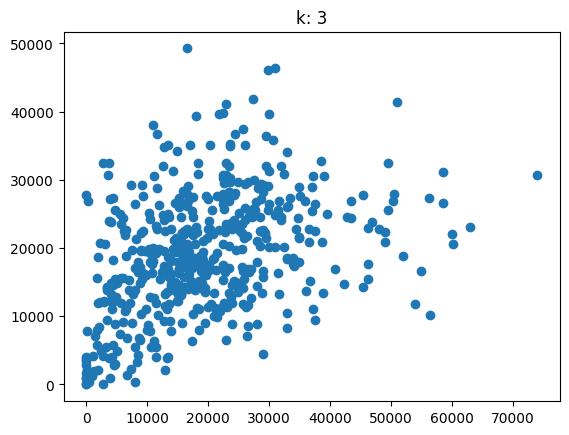

SSE: 58699563053.020004


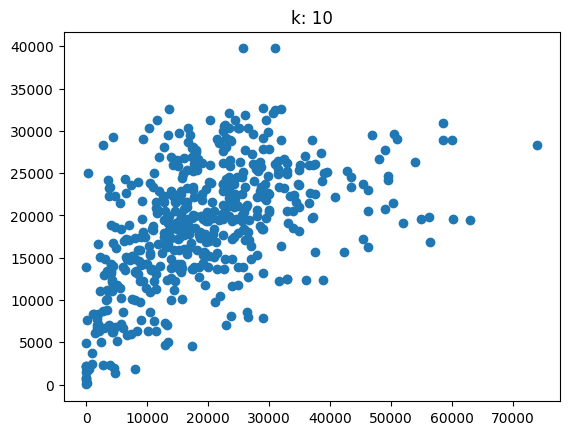

SSE: 56300227579.95039


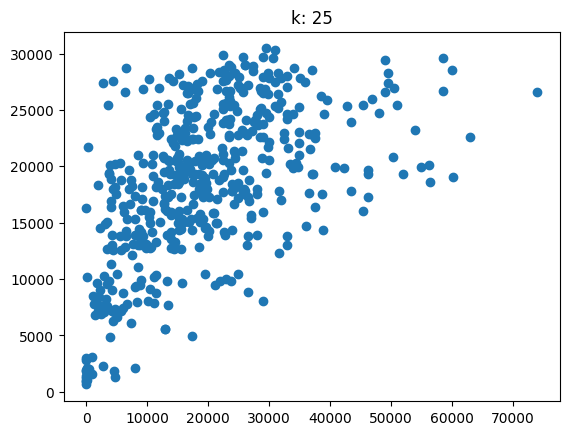

SSE: 55101274650.7148


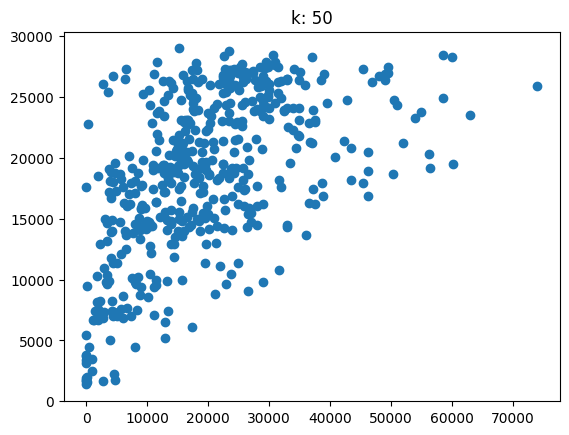

SSE: 56125537668.8336


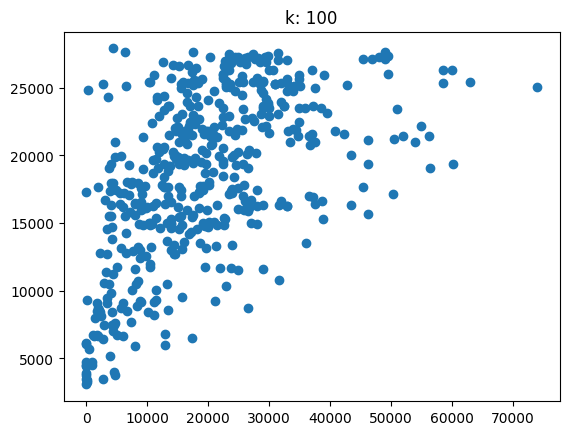

SSE: 57248993878.99795


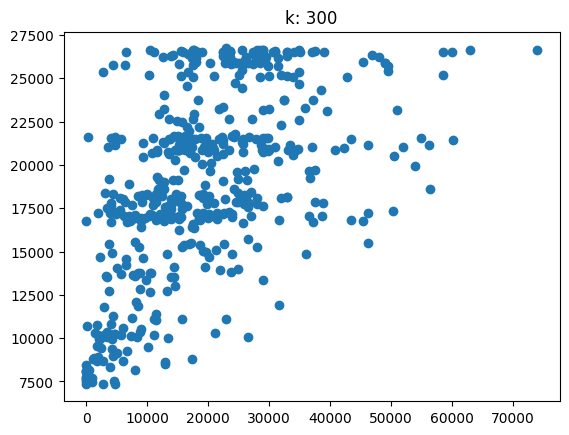

In [31]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

k_vals = [3,10,25,50,100,300]
for k in k_vals:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_hat = knn.predict(X_test)
    sse = np.sum( (y_test-y_hat)**2 )
    plot, axes = plt.subplots()
    plt.scatter(y_test,y_hat)
    plt.title('k: ' + str(k))
    print('SSE: '+ str(sse))
    plt.show()

>As $k$ increases, the range of values smoothens out and are less influenced by outliers. In the mid range of 25 and 50, the SSE is the lowest and as you approach 100 and 300, the SSE beings to rise again.

5. Determine the optimal $k$ for these data.


49


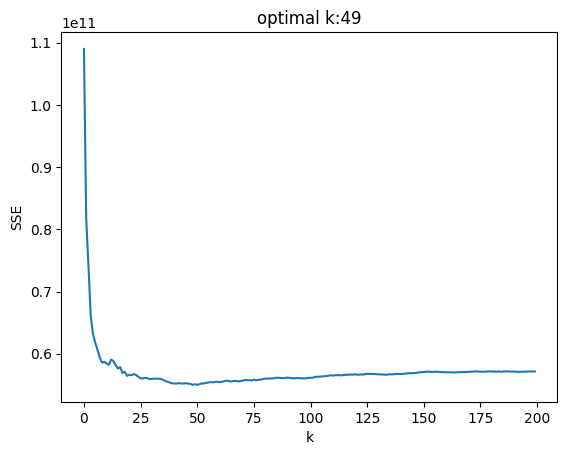

In [30]:
mse_values = []
k_bar = 200

for k in range(k_bar):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    knn.fit(X_train,y_train) 
    y_hat = knn.predict(X_test) 
    mse_values.append(np.sum( (y_test-y_hat)**2 ))

k_range = range(1,k_bar)
optimal_k = k_range[np.argmin(mse_values)]
optimal_mse = min(mse_values)
print(optimal_k)

plt.plot(np.arange(0,k_bar),mse_values) 
plt.xlabel("k")
plt.title("optimal k:"+str(optimal_k))
plt.ylabel('SSE')
plt.show()

>Optimal $k$: 49

6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

>The optimal $k$ is at 49. For values that exceed this significantly (e.g. in the 300+ range), the model is likely underfitting because it becomes too smooth, as evident in the graph above where there appears to be horizontal groupings. As for $k$'s that are very low int the 3-25 range, the model is likely overfitting because it captures even minor variations in the data and is highly sensitive to individual data points including outliers.